## MEAM 5170 Final Project Group 17 
Shreya Lanjewar, Nikola Obradovic, Emily Paul

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from pydrake.all import (MultibodyPlant, Parser, RigidTransform)
import acrobot, acrobot_sim, visualizer, environment, controllers
import importlib
importlib.reload(acrobot)
importlib.reload(acrobot_sim)
importlib.reload(visualizer)
importlib.reload(environment)
importlib.reload(controllers)
from acrobot_sim import simulate_acrobot
from acrobot import Acrobot
from visualizer import AcrobotVisualizer, create_animation
from environment import Environment, Hold
from controllers import *

plant = MultibodyPlant(time_step=0)
parser = Parser(plant)
parser.AddModels("acrobot.urdf")
plant.WeldFrames(
    plant.world_frame(),
    plant.GetBodyByName("base").body_frame(),
    RigidTransform.Identity()
)
plant.Finalize()

bot = Acrobot(plant)
env = Environment(-5, 5, -5, 5, 0.15, initial_hold=(0., 0.))
env.generate_single_hold(np.array([-2.5,0]))
controller = ZeroController(bot)
path_planner = TrivialPathPlanner(env)


simresults = simulate_acrobot(np.array([-3*np.pi/4, np.pi/16, 0, 0]), 5, bot,
                           controller, path_planner)

viz = AcrobotVisualizer(bot, env)
# viz.draw(simresults.x[0,:], simresults.t[0], simresults.origin_offsets[0], 
#          simresults.pose[0], simresults.current_holds[0], simresults.next_holds[0])
ani = create_animation(viz,simresults.x,simresults.t, simresults.origin_offsets, 
                       simresults.pose, simresults.current_holds, simresults.next_holds)
plt.close()
HTML(ani.to_jshtml())

# fig1 = plt.figure(figsize=(4,3))
# plt.plot(t, x[:,0], label='x_0')
# plt.plot(t, x[:,1], label='x_1')
# plt.plot(t, x[:,2], label='x_2')
# plt.plot(t, x[:,3], label='x_3')
# plt.legend()



In [44]:
res = simresults._asdict()

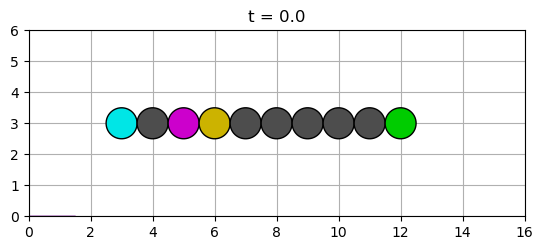

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from pydrake.all import (MultibodyPlant, Parser, RigidTransform)
import acrobot, acrobot_sim, visualizer, environment, controllers
import importlib
importlib.reload(acrobot)
importlib.reload(acrobot_sim)
importlib.reload(visualizer)
importlib.reload(environment)
importlib.reload(controllers)
from acrobot_sim import simulate_acrobot
from acrobot import Acrobot
from visualizer import AcrobotVisualizer, create_animation
from environment import Environment, Hold
from controllers import *

env2 = Environment(grasp_radius=0.5)
env2.generate_static_monkey_bars(10,1)
viz2 = AcrobotVisualizer(bot,env2)
viz2.draw(np.array([0,0,0,0]),0,current_hold=2, next_hold=3)

In [1]:
import matplotlib.animation as animation

f = r"animation.gif" 
writergif = animation.PillowWriter(fps=50) 
ani.save(f, writer=writergif)

NameError: name 'ani' is not defined

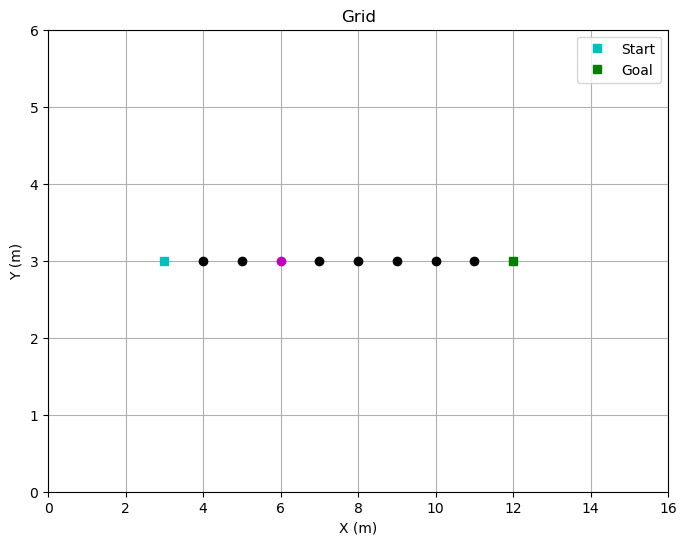

In [ ]:
env = Environment()
env.generate_static_monkey_bars(10, 1)
env.holds[3].is_latched = True
path = "./env_plot/monkey_bar_test.png"
env.plot(path)